# Practical Machine Learning Assignment 04 Part B
Ryan Haggerty

Task/Problem Statement: 
- The goal of Part B of this assignment is to find the optimal MLP model on the CIFAS-10 dataset.

### Dataset

##### Description: 
The CIFAR-10 dataset is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

###### Source:
https://keras.io/api/datasets/cifar10/

##### Categories:
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

C:\Users\ryguy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ryguy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ryguy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ryguy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data & Displat Dataset Information

In [14]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train_full.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Convert train and test labels from column vector to 1D array
y_train_full=y_train_full.ravel()
y_test=y_test.ravel()

# Create validation dataset as well as scale (max-min scaling) the data
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = x_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

No. of Training Samples:  (45000, 32, 32, 3)
No. of Training Labels:  (45000,)

No. of Validation Samples:  (5000, 32, 32, 3)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 32, 32, 3)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


## Experiment 1

In [15]:
%%time
# Experiment 1
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer1 = 'random_normal'
activation1 = 'relu'
number_of_classes1 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model1 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model1.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model1.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer1, activation=activation1, 
                             bias_initializer="zeros"))

model1.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer1, activation=activation1,
                            bias_initializer="zeros"))

model1.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer1, activation=activation1,
                            bias_initializer="zeros"))

model1.add(tf.keras.layers.Dense(units=number_of_classes1, kernel_initializer=kernel_initializer1, 
                             activation="softmax"))

# Display a summary of the model
model1.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 963,110
Trainable params: 963,110
Non-trainable params: 0
_________________________________________________________________
Wall time: 65.7 ms


### Train Model 1

In [16]:
%%time
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs to 50 and mini batch size to 64 according to assignment guidelines
# We will keep these the same for all experiments as well
no_of_epochs = 50
size_of_mini_batch = 64

# Train the model
history1 = model1.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
704/704 [==============================] - 5s 6ms/step - loss: 1.9339 - accuracy: 0.2947 - val_loss: 2.4192 - val_accuracy: 0.1976
Epoch 2/50
704/704 [==============================] - 4s 6ms/step - loss: 1.7335 - accuracy: 0.3771 - val_loss: 3.2735 - val_accuracy: 0.1892
Epoch 3/50
704/704 [==============================] - 4s 6ms/step - loss: 1.6521 - accuracy: 0.4068 - val_loss: 2.1136 - val_accuracy: 0.2820
Epoch 4/50
704/704 [==============================] - 4s 6ms/step - loss: 1.5807 - accuracy: 0.4348 - val_loss: 1.7814 - val_accuracy: 0.3664
Epoch 5/50
704/704 [==============================] - 4s 6ms/step - loss: 1.5335 - accuracy: 0.4512 - val_loss: 1.8037 - val_accuracy: 0.3796
Epoch 6/50
704/704 [==============================] - 4s 6ms/step - loss: 1.4927 - accuracy: 0.4680 - val_loss: 1.6184 - val_accuracy: 0.4254
Epoch 7/50
704/704 [==============================] - 4s 6ms/step - loss: 1.4548 - accuracy: 0.4793 - val_loss: 2.1587 - val_accuracy: 0.3370
Epoch 

### Evaluate Model 1

Epochs:  32

Test Data: Loss & Accuracy:  [2.18322491645813, 0.3935000002384186]

Train Accuracy:  0.10005417530864198

Test Accuracy:  0.1

Test Confusion Matrix:
[[666  15   4   7  14   2   9  92  68 123]
 [ 86 476   1  14  15   1  11  30  61 305]
 [208   8  51  42 137  16  64 345  20 109]
 [147  22   9 194  49  52  85 203  23 216]
 [206  10   7  28 238  11  73 323  25  79]
 [118  12   8 169  50 125  53 284  39 142]
 [155  24  23  56  70  12 369 160  17 114]
 [ 93  16   3  23  32   9  16 653  10 145]
 [235  38   0  15   7   2   5  46 413 239]
 [ 69  94   1   6   3   1   5  38  33 750]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.67      0.45      1000
           1       0.67      0.48      0.56      1000
           2       0.48      0.05      0.09      1000
           3       0.35      0.19      0.25      1000
           4       0.39      0.24      0.29      1000
           5       0.54      0.12      0.20      1000
  

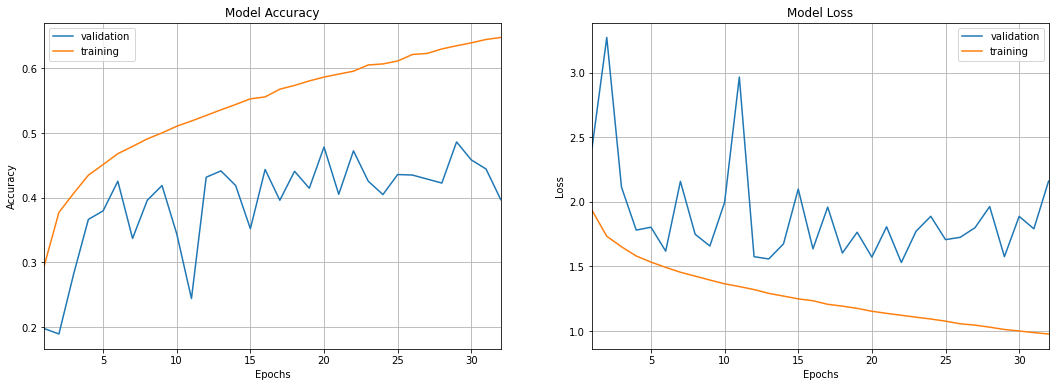

In [10]:
numOfEpochs1 = len(history1.history['loss'])
print("Epochs: ", numOfEpochs1)

print("\nTest Data: Loss & Accuracy: ", model1.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted1 = model1.predict(X_test)
y_test_predicted1 = np.argmax(y_test_predicted1, axis=1) # get the label/index of the highest probability class


y_train_predicted1 = model1.predict(X_train)
y_train_predicted1 = np.argmax(y_train_predicted1, axis=1) # get the label/index of the highest probability class

train_accuracy1 = np.mean(y_train_predicted1 == y_train)
print("\nTrain Accuracy: ", train_accuracy1)

test_accuracy1 = np.mean(y_test_predicted1 == y_test)
print("\nTest Accuracy: ", test_accuracy1)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted1))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted1))

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs1+1),history1.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs1+1),history1.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs1])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs1+1),history1.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs1+1),history1.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs1])
plt.grid(True)
plt.title("Model Loss")

plt.show()